### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

H<sub>0</sub>: μ<sub>coffee</sub> = μ<sub>non-coffee</sub>

H<sub>1</sub>: μ<sub>coffee</sub> ≠ μ<sub>non-coffee</sub>

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

H<sub>0</sub>: μ<sub>coffee</sub> $\ge$ μ<sub>non-coffee</sub>

H<sub>1</sub>: μ<sub>coffee</sub> < μ<sub>non-coffee</sub>

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [2]:
bootsample = sample_data.sample(200, replace = True)

In [3]:
coffee_mean = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
non_coffee_mean = bootsample[bootsample['drinks_coffee'] == False]['height'].mean() 

obs_diff = coffee_mean - non_coffee_mean
obs_diff

1.9732964788157403

In [4]:
diff_means = []
drink_means = []
no_drink_means = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace = True) 
    coffee_mean = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    non_coffee_mean = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    
    drink_means.append(coffee_mean)
    no_drink_means.append(non_coffee_mean)
    diff_means.append(coffee_mean - non_coffee_mean)

In [5]:
# Std of the mean of non-coffee drinkers
np.std(no_drink_means)

0.40510128379536048

In [6]:
# Std of the mean of coffee drinkers
np.std(drink_means)

0.2407402135644629

In [7]:
# Std of the difference in means
np.std(diff_means)

0.46978174056315813

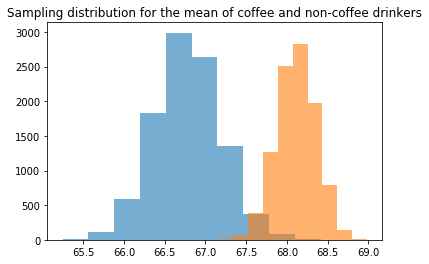

In [8]:
plt.hist(no_drink_means, alpha = 0.6);
plt.hist(drink_means, alpha = 0.6);
plt.title('Sampling distribution for the mean of coffee and non-coffee drinkers');

Text(0.5,1,'Sampling distribution for the difference in means of both groups')

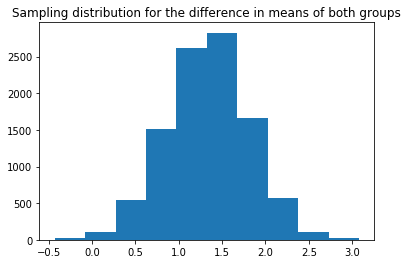

In [9]:
plt.hist(diff_means);
plt.title('Sampling distribution for the difference in means of both groups')

Notice the standard deviation with the difference in means is larger than either of the individual. 

The standard deviation of the difference is actually the square root of the sum of the variance of each of the individual sampling distributions. 

And the mean has a standard deviation of the original draws divided by the square root of the sample size taken. 

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [10]:
null_vals = np.random.normal(0, np.std(diff_means), 10000)

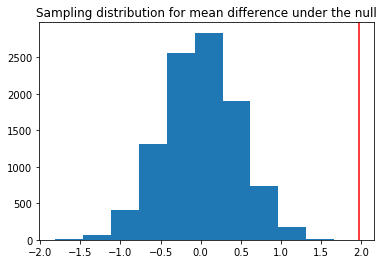

In [11]:
plt.hist(null_vals)
plt.title('Sampling distribution for mean difference under the null');

plt.axvline(x=obs_diff, c='red');